# 1. Business understanding

# 1.1 Target


Предсказание качества вина на основе физико-химических характеристик.

# 1.2 Description

Используя машинное обучение, можно построить модель, которая сможет предсказывать тип вина и его свойства на основе его физико-химических свойств. Это может помочь производителям вина лучше контролировать качество своей продукции, винным экспертам - лучше разбираться в винах, а потребителям - делать более осознанный выбор при покупке вина.
Датасет содержит различные физико-химические свойства вина, включая уровень алкоголя, кислотность, содержание сахара, плотность и т.д.
Этот набор данных может быть использован для решения задач двумя способами: регрессии и классификации.
В случае регрессии, целевая переменная рассматривается как непрерывная величина.
В случае классификации, целевая переменная рассматривается как дискретная величина.

# 2. Data Understanding

# 2.1 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error , accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# создаем словарь в котором будут сохранятся подсчитанные метрики
pivot_models_score ={'score':[]}

# 2.2 Downloading dataset

In [ ]:
df = pd.read_csv('/content/winequalityN.csv')
df.shape

(6497, 13)

# 2.3 Statistic and visualization

In [ ]:
df.head (10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


Описание переменных:   

1. type/Тип вина: красное или белое
2. fixed acidity/Фиксированная кислотность: Нелетучие летучие кислоты вина (не испаряются легко).
3. volatile acidity/Летучая кислотность: количество уксусной кислоты в вине.
4. citric acid/Лимонная кислота: придает вкус вину и содержится в небольшом количестве.
5. residual sugar/Остаточный сахар: Содержание сахара после остановки брожения.
6. chlorides/Хлориды: остаточная соль в вине.
7. free sulfur dioxide/Свободный диоксид серы: Свободная форма SO2 существует в равновесии между молекулярным SO2 (в виде растворенного газа) и бисульфитным ионом; предотвращает рост микробов и окисление вина
8. total sulfur dioxide/Общий диоксид серы: количество свободных и связанных форм S02.
9. density/Плотность: Плотность вещества — это его масса на единицу объема.
10. PH: Описывает, насколько кислотным или основным является вещество по шкале от 0 до 4.
11. sulphates/Сульфаты: винная добавка, которая может способствовать повышению уровня диоксида серы (S02).
12. alcohol/Алкоголь: процент содержания алкоголя в вине.
13. quality/ Качество: Оценка от 0 до 10.

На основе информации с сайта Kaggle

# 2.3.1 Checking the key characteristics of variables

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Практически все переменные имеют численное значение, с плавающей точкой.

Только переменная типа вина - type -  представлена типом object , а целевая переменная quality - представлена целочисленным значением.

Пропуски в датасете не значительны - максимальные пропущенные значения в переменных fixed acidity , volatile acidity , ph.

Посмотрим на распределение значений по типу и качеству вина:

In [ ]:
df['type'].value_counts(normalize = True)

white    0.753886
red      0.246114
Name: type, dtype: float64

В датасете данные по целевой переменой не сбалансированы - представлено больше данных для белого вина, чем для красного.
Колличество значений для белого вина равно 75.4 % , для красного вина равно 24.6%.

In [ ]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

В датасете преобладают оценки качества вина: 6, 5, 7.

# 2.3.2 Data Vusualization

Изучая корреляции с помощью тепловой карты и визуализации попарных взаимосвязей с помощью парного графика, мы получаем информацию, которая поможет с выбором модели машинного обучения.

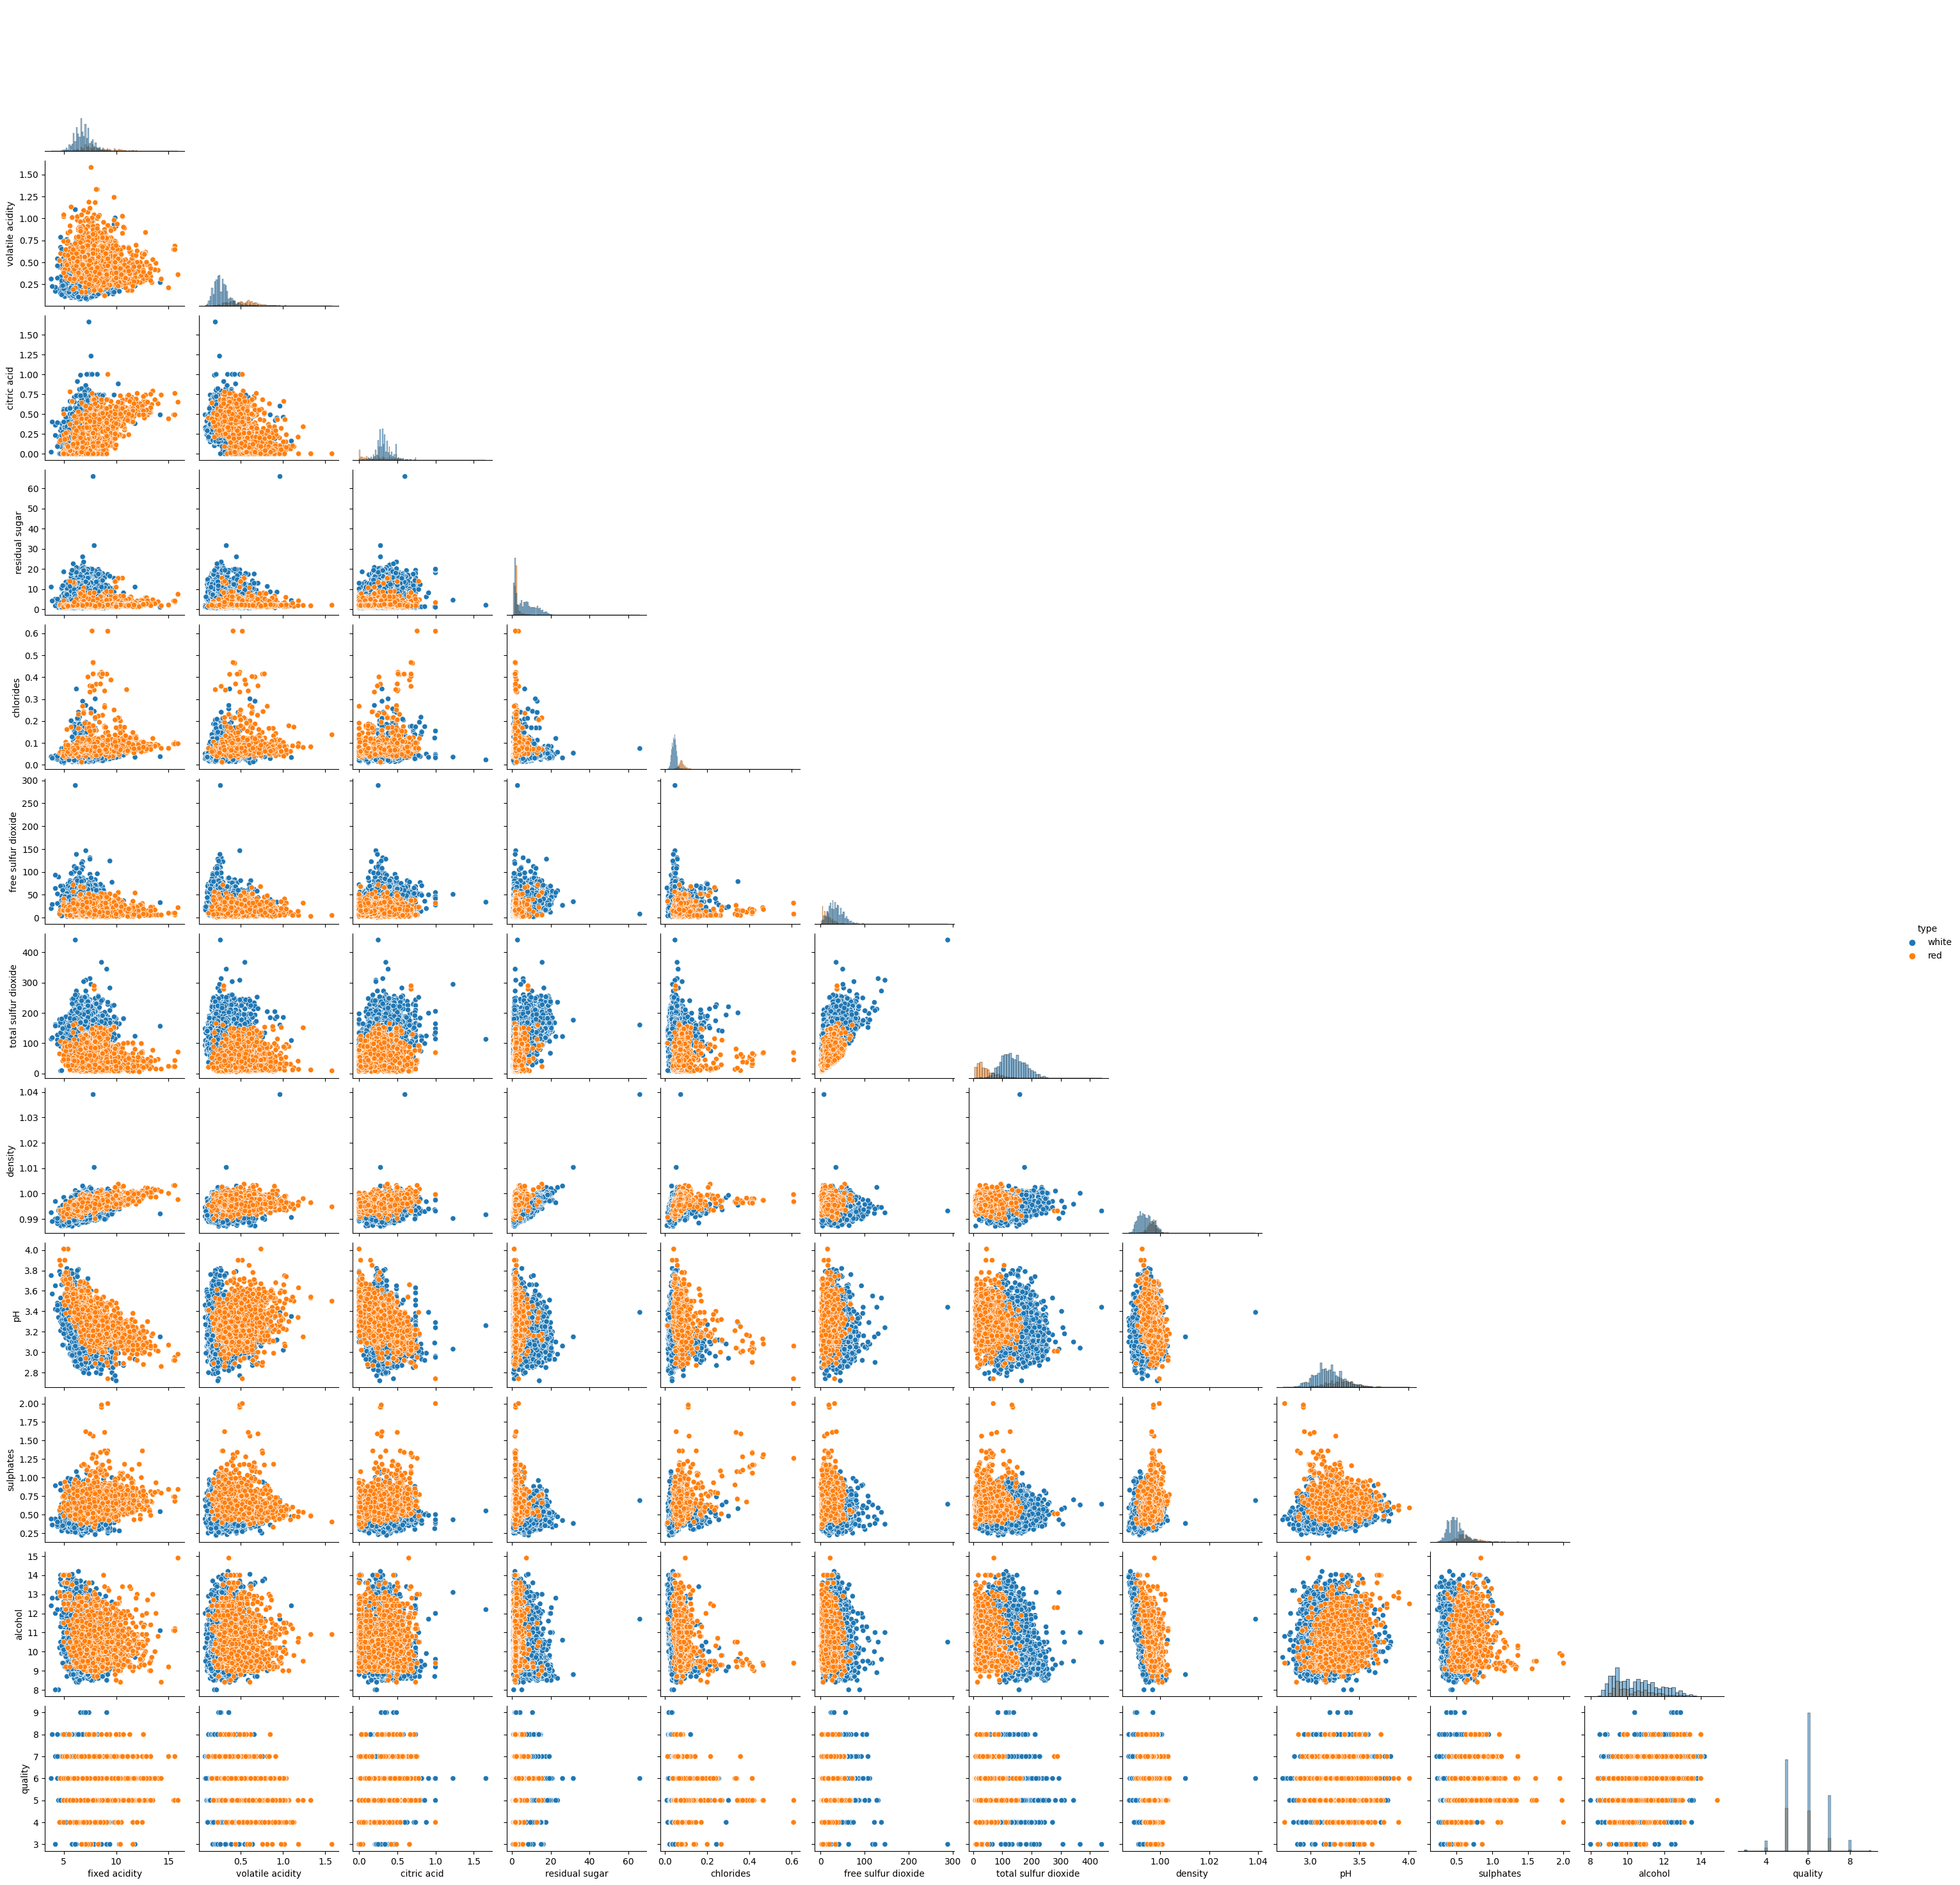

In [ ]:
sns.pairplot(df, hue = "type", diag_kind = 'hist', corner = True)
plt.show()

<ipython-input-11-c92cacfc2720>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


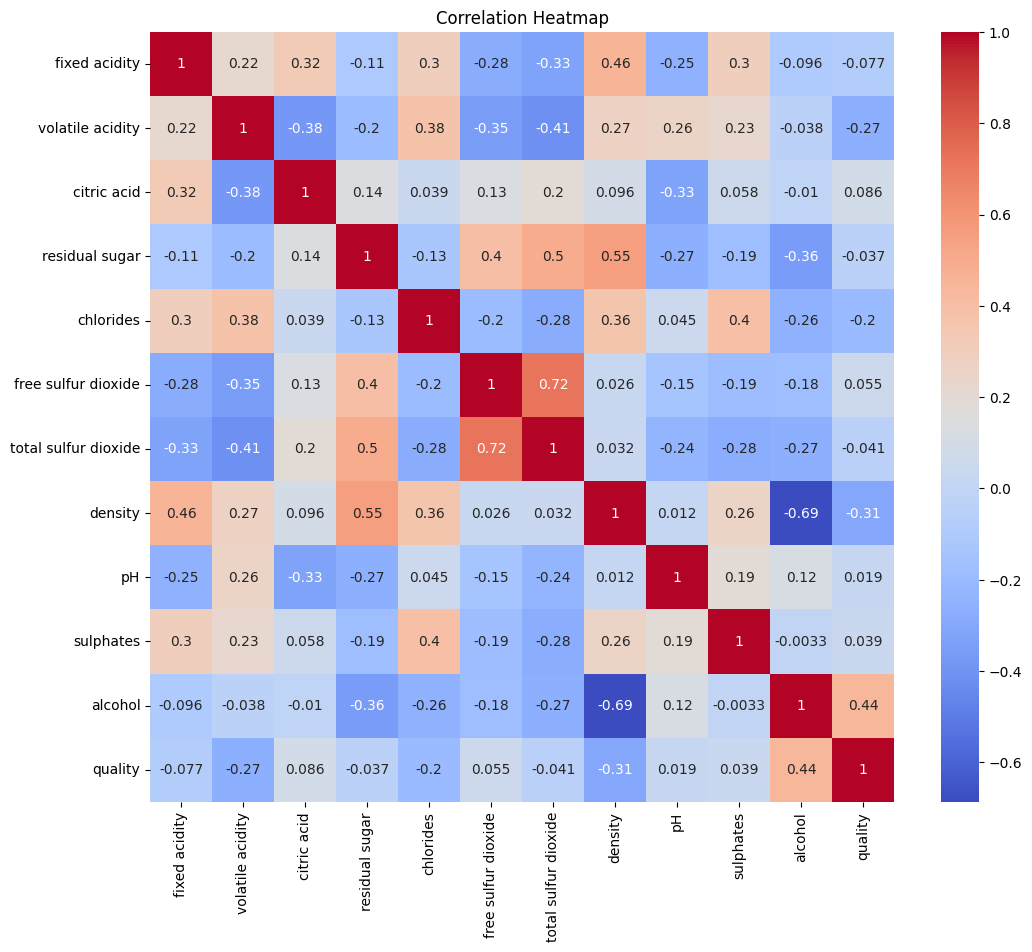

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize= (12,10))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Содержание алкоголя демонстрирует самую сильную положительную корреляцию с качеством вина (0,44), указывая на то, что более высокое содержание алкоголя связано с лучшим качеством вина.

Летучая кислотность имеет заметную отрицательную корреляцию с качеством вина (-0,27), что позволяет предположить, что более низкая летучая кислотность связана с более высоким качеством вин.

Плотность имеет отрицательную корреляцию с качеством вина (-0,31), и поскольку она также имеет сильную отрицательную корреляцию с содержанием алкоголя (-0,69), можно сделать вывод, что вина более высокого качества, как правило, имеют меньшую плотность и более высокое содержание алкоголя.

Самая сильная корреляция в наборе данных наблюдается между свободным диоксидом серы и общим содержанием диоксида серы (0,72), что указывает на то, что вина с большим количеством свободного диоксида серы также, как правило, содержат большее количество общего диоксида серы.

Построим отдельный график связи - качества вина, содержания алкоголя, и плотности.

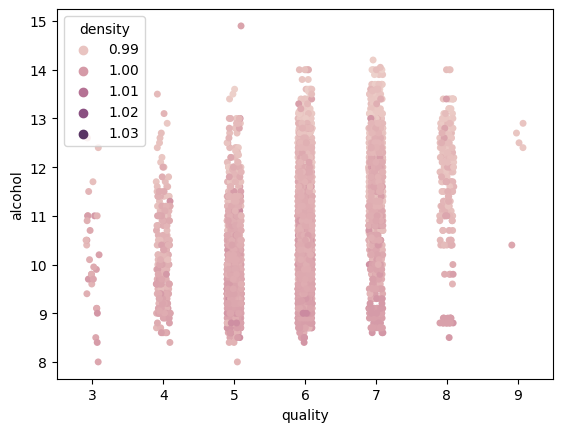

In [ ]:
sns.stripplot(x="quality", y="alcohol", hue="density", data=df);

##Построим более детальный график распределения целевой переменной - качества вина

In [ ]:
import plotly.express as px
fig = px.histogram(df, x = 'quality', marginal = 'box',
                   title = "Quality Distribution",
                   color_discrete_sequence= ['green'])
fig.update_layout(bargap=0.1)
fig.show()

По графику видим, что данные распеределены нормально. Больше всего качество вина оценивали шестью, что явлется чуть выше среднего значения по шкале от 0 до 10.

# 3. Data Preparation

# 3.1 Обработка пропущенных значений.

Есть несколько способов обработки пропущенных значений. В данном случае применим к пропущенным данным среднее значение по столбцу.

In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
       df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 3.2 Предобработаем данные с помощью StandartScaling и нормализации.

In [ ]:
X = df.drop(columns=['quality'])
y = df['quality']

encoder = LabelEncoder()
X['type'] = encoder.fit_transform(X['type'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3.3 Split data to train and test

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X , y , test_size= 0.2 , random_state= 42)

In [ ]:
X_train.shape , y_train.shape, X_test.shape , y_test.shape

((5197, 12), (5197,), (1300, 12), (1300,))

# 3.4 Feature importance

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_)

[0.00735028 0.07759637 0.09852935 0.08277058 0.083053   0.08117189
 0.0865503  0.08911204 0.092971   0.08170362 0.08574092 0.13345065]


In [ ]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feat_importances = pd.Series(model.feature_importances_,index = feature_names)

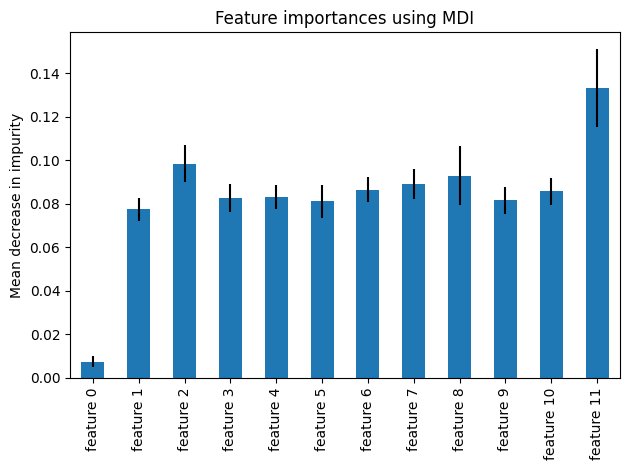

In [ ]:
fig, ax = plt.subplots()
feat_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


По графику видим, что наибольший вклад в целевую  переменную вносят значения переменной алкоголя/ alcohol, летучей кислотности/volatile acidity, плотности/ density, остальные переменные вносят одинаковый вклад. Нименьшее влияние оказывает тип вина/type.

# 4.Building and Evaluation different models.


# 4.1 Building base model - Linear Regression

Для начала строим базовую модель, в нашем случае модель линейной регрессии, чтобы можно было понимать от каких значений можно отталкиваться при построении более сложных моделей.

In [ ]:
LR_model = LinearRegression()

In [ ]:
LR_model.fit(X_train, y_train)

LinearRegression()

# 4.1.1 Model evaluation

Для оценки модели используем метрику RMSE

In [ ]:
X_train_pred = LR_model.predict(X_train)
train_rmse = (mean_squared_error(X_train_pred,y_train))**0.5
print(f'Train RMSE mentric:{train_rmse}')
X_test_pred = LR_model.predict(X_test)
test_rmse = (mean_squared_error(X_test_pred, y_test))** 0.5
print(f'Test RMSE metric:{test_rmse}')

Train RMSE mentric:0.7435866578077689
Test RMSE metric:0.6866012379247409


In [ ]:
pivot_models_score['score'].append((mean_squared_error(X_test_pred, y_test))** 0.5)

Мы получили метрику RMSE на тестсе равную 0,68, что является средним результатом. Из положительной тенденции можно отметить, что метрика RMSE  на обучаемых данных имеет более высокую оценку, следовательно нет переобучения модели.

# 4.2 Building Classification model - DecisionTreeClassifier

Построим модель классификации - DecisionTreeClassifier

In [ ]:
DesTree_model= DecisionTreeClassifier()
DesTree_model.fit(X_train,y_train)

DecisionTreeClassifier()

# 4.2.1 Model evaluation

Для оценки используем метрики  accuracy и F1

In [ ]:
DesTree_pred=DesTree_model.predict(X_test)
print(f'Accuracy for Decision Tree Classifier is: {metrics.accuracy_score(y_test,DesTree_pred)}')
print(f' F1 score for Decision Tree Classifier is: {metrics.f1_score(y_test,DesTree_pred,average="micro")}')

Accuracy for Decision Tree Classifier is: 0.6169230769230769
 F1 score for Decision Tree Classifier is: 0.6169230769230769


In [ ]:
pivot_models_score['score'].append(metrics.accuracy_score(y_test,DesTree_pred))

Получаем, примерно, такие же результаты , как и в случае с моделью логистической регресси.

# 4.3 Try different approach for classification model/ Building RandomForest classifier model

Модель классификации показала не очень хорошие результаты для колличества классов от 0 до 10.
Уменьшим колличество классов качества вина до трех и посмотрим, как модель классификации справится в этом случае.

1 -3 - будет соответствовать плохому вину / bad wine

4 - 7 - хорошее виино /good wine

8-10 - превосходное вино / excellent wine

In [ ]:
def qual_to_category(number):
    if 1<= number['quality'] <= 3:
        return "bad wine"
    elif 4 <= number['quality']<= 7:
        return "good wine"
    else:
        return "excellent wine"

df['wine_qual'] = df.apply(qual_to_category,axis = 1)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_qual
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,good wine
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,good wine
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,good wine
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good wine
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good wine


Определяем для целевой переменной новое значение.
Разбиваем датасет на обучающую и тестовую выборки.

In [ ]:
y = df['wine_qual']
X_train, X_test , y_train , y_test = train_test_split(X, y ,test_size= 0.2 , random_state = 42)

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit (X_train , y_train)

RandomForestClassifier()

# 4.3.1 Model evaluation

Для оценки испоользуем метрику - accuracy

In [ ]:
rfc_predict = rfc_model.predict(X_test)
print(f' Accuracy for RandomForest Classifier is: {metrics.accuracy_score(y_test, rfc_predict)}')

 Accuracy for RandomForest Classifier is: 0.9769230769230769


In [ ]:
pivot_models_score['score'].append(metrics.accuracy_score(y_test, rfc_predict))

Получаем результат accuracy равный 0.98

# 4.4  Pivot table for models scores.

Объединияем все значения оценок моделей в одну сводную таблицу, для лучшего представления.

In [ ]:
pivot_models_score_df=pd.DataFrame(pivot_models_score)
pivot_models_score_df

,score
0,0.686601
1,0.616923
2,0.976923


In [ ]:
pivot_models_score_df.drop_duplicates(inplace=True)

In [ ]:
pivot_models_score_df.rename(index={0:'LinearRegression', 1:'DecisionTreeClassifier', 2:'RandomForest Classifier'}, inplace=True)

In [ ]:
pivot_models_score_df.sort_values('score',ascending=False).style.background_gradient(cmap='Wistia',subset=['score'])

,score
RandomForest Classifier,0.976923
LinearRegression,0.686601
DecisionTreeClassifier,0.616923


# 5. Model Inference

Лучшие результаты показала модель Random Forest Classifier , поэтому сохраним ее для инференса.

In [ ]:
x_predict = list(rfc_model.predict(X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
3103,good wine,good wine
1419,good wine,good wine
4761,good wine,good wine
4690,good wine,good wine
4032,good wine,good wine
1297,good wine,good wine
1773,good wine,good wine
5584,good wine,good wine
561,good wine,good wine
5946,good wine,good wine


In [ ]:
import pickle
file = 'wine_quality_predict'
#save file
save = pickle.dump(rfc_model,open(file,'wb'))